### Задача 1: сравнение предложений
    
   Дан набор предложений, скопированных с Википедии. Каждое из них имеет "кошачью тему" в одном из трех смыслов:

- кошки (животные)

- UNIX-утилита cat для вывода содержимого файлов версии операционной системы OS X, названные в честь семейства кошачьих

    Ваша задача — найти два предложения, которые ближе всего по смыслу к расположенному в самой первой строке. В качестве меры близости по смыслу мы будем использовать косинусное расстояние.

Выполните следующие шаги:

1) Скачайте файл с предложениями (sentences.txt).

2) Каждая строка в файле соответствует одному предложению. Считайте их, приведите каждую к нижнему регистру с помощью строковой функции lower().

3) Произведите токенизацию, то есть разбиение текстов на слова. Для этого можно воспользоваться регулярным выражением, которое считает разделителем любой символ, не являющийся буквой: re.split('[^a-z]', t). Не забудьте удалить пустые слова после разделения.

4) Составьте список всех слов, встречающихся в предложениях. Сопоставьте каждому слову индекс от нуля до (d - 1), где d — число различных слов в предложениях. Для этого удобно воспользоваться структурой dict.

5) Создайте матрицу размера n * d, где n — число предложений. Заполните ее: элемент с индексом (i, j) в этой матрице должен быть равен количеству вхождений j-го слова в i-е предложение. У вас должна получиться матрица размера 22 * 254.

6) Найдите косинусное расстояние от предложения в самой первой строке (In comparison to dogs, cats have not undergone...) до всех остальных с помощью функции scipy.spatial.distance.cosine. Какие номера у двух предложений, ближайших к нему по этому расстоянию (строки нумеруются с нуля)? Эти два числа и будут ответами на задание. Само предложение (In comparison to dogs, cats have not undergone... ) имеет индекс 0.

7) Запишите полученные числа в файл, разделив пробелом. Обратите внимание, что файл должен состоять из одной строки, в конце которой не должно быть переноса. Пример файла с решением вы можете найти в конце задания (submission-1.txt).

8) Совпадают ли ближайшие два предложения по тематике с первым? Совпадают ли тематики у следующих по близости предложений?

In [68]:
import numpy as np
import scipy
from scipy import spatial as sp
import re

In [82]:
# Считаем файл, переведём всё в нижний регистр
file_obj = open('sentences.txt')
#file_obj = open('anaconda.txt')
data_list = file_obj.readlines()
data_list = [i.lower().replace('\n', '') for i in data_list]

In [92]:
# Проведём токенизацию и составим список всех слов из текста, без учёта пустых слов
words_data = []
for i in data_list:
    #print(i, type(i))
    #words_data.append(re.split('[^a-z]', i))
    tmp = re.split('[^a-z]', i)
    for j in tmp:
        if len(j) > 0 and j not in words_data:
            words_data.append(j)

In [95]:
# Создадим словарь
numbers = range(len(words_data))
word_dict = dict((i, words_data[i]) for i in range(len(words_data)))

In [102]:
matrix = np.zeros((len(data_list), len(word_dict)))
for i in range(np.shape(matrix)[0]):
    for j in range(np.shape(matrix)[1]):
        tmp = data_list[i].split()
        #print(type(tmp))
        #matrix[i][j] = tmp.count(word_dict[j])
        matrix[i][j] = list(data_list[i]).count(word_dict[j])
        #print(word_dict[j])
        #print(data_list[i])

#print(*matrix)
forans = {}
        
for i in range(len(data_list)):
    tmp = sp.distance.cosine(matrix[0], matrix[i])
    forans[tmp] = i

sorted(forans.items())
#ans = [sorted(forans.items())[1][1], sorted(forans.items())[2][1]]

[(0.0, 0),
 (0.007193509243130225, 4),
 (0.008264462809917328, 1),
 (0.009474132463341944, 6),
 (0.011523951442169778, 11),
 (0.012790357356660453, 16),
 (0.012986063644414791, 5),
 (0.016890332477461634, 13),
 (0.017024549244726517, 18),
 (0.020727326642215438, 14),
 (0.03776052035527666, 3),
 (0.03876373065991734, 8),
 (0.04521043248541501, 20),
 (0.045372698041357795, 9),
 (0.051365100454634605, 7),
 (0.056015299534806884, 17),
 (0.058525827439268596, 21),
 (0.06268766177625262, 10),
 (0.0726133146206267, 15),
 (0.08222331170007535, 12),
 (0.08450191737297219, 19),
 (0.12044884847117476, 2)]

In [86]:
# Отберём 2 предложения, которые ближе всего по смыслу к первому и запишем в файл ansone
file_obj = open('submission1', 'w')
file_obj.writelines(i + ' ' for i in map(str, ans))
file_obj.close()

### Задача 2: аппроксимация функции

Рассмотрим сложную математическую функцию на отрезке [1, 15]:

f(x) = sin(x / 5) * exp(x / 10) + 5 * exp(-x / 2)

Она может описывать, например, зависимость оценок, которые выставляют определенному сорту вина эксперты, в зависимости от возраста этого вина. По сути, задача машинного обучения состоит в том, чтобы приблизить сложную зависимость с помощью функции из определенного семейства. В этом задании мы будем приближать указанную функцию с помощью многочленов.

Как известно, многочлен степени n (то есть w_0 + w_1 x + w_2 x^2 + ... + w_n x^n) однозначно определяется любыми n + 1 различными точками, через которые он проходит. Это значит, что его коэффициенты w_0, ... w_n можно определить из следующей системы линейных уравнений:

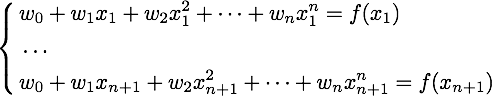

где через x_1, ..., x_n, x_{n+1} обозначены точки, через которые проходит многочлен, а через f(x_1), ..., f(x_n), f(x_{n+1}) — значения, которые он должен принимать в этих точках.

Воспользуемся описанным свойством, и будем находить приближение функции многочленом, решая систему линейных уравнений.

In [125]:
import math as mt
from scipy import linalg
#import matplotlib.pyplotot as plt
from matplotlib import pyplot as plt

1) Сформируйте систему линейных уравнений (то есть задайте матрицу коэффициентов A и свободный вектор b) для многочлена первой степени, который должен совпадать с функцией f в точках 1 и 15. Решите данную систему с помощью функции scipy.linalg.solve. Нарисуйте функцию f и полученный многочлен. Хорошо ли он приближает исходную функцию?

In [109]:
def f(x):
    return mt.sin(x / 5) * mt.exp(x / 10) + 5 * mt.exp(-x / 2)

In [118]:
# Многочлен первой степени имеет вид w0 + w1 * x = y
b = np.array([f(1), f(15)])
A = np.array([[1, 1], [1, 15]])
ansone = scipy.linalg.solve(A, b)

In [133]:
def f1(w0, w1, x):
    return w0 + w1 * x

Text(0.5, 1.0, 'Исходный график и изображение полученнного многочдена 1-й степени')

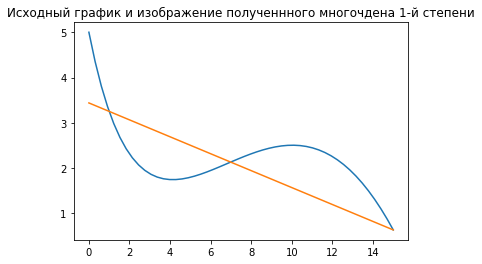

In [137]:
# Построим графики
x = np.linspace(0, 15, 50)
y = [f(i) for i in x]
y1 = [f1(ansone[0], ansone[1], i) for i in x]
plt.plot(x, y, x, y1)
plt.title('Исходный график и изображение полученнного многочлена 1-й степени')

2) Повторите те же шаги для многочлена второй степени, который совпадает с функцией f в точках 1, 8 и 15. Улучшилось ли качество аппроксимации?

In [145]:
# Сделаем то же самое только для многочлена второй степени
# Многочлен 2-й степени имеет вид: w0 + w1*x + w2 * x^2
b1 = np.array([f(1), f(8), f(15)])
A1 = np.array([[1, 1, 1], [1, 8, 8 ** 2], [1, 15, 15 ** 2]])
anstwo = scipy.linalg.solve(A1, b1)

In [146]:
anstwo

array([ 3.32512949, -0.06531159, -0.00760104])

In [155]:
def f2(w0, w1, w2, x):
    return(w0 + w1*x + w2 * (x ** 2))

Text(0.5, 1.0, 'Исходный график и изображение полученнного многочленов 1-й и 2-й степени')

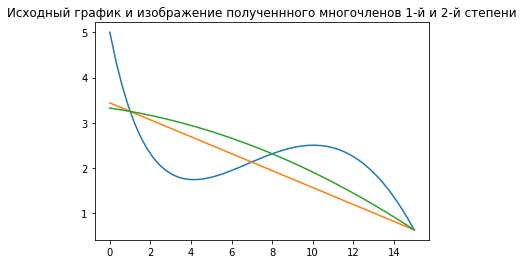

In [156]:
y2 = [f2(anstwo[0], anstwo[1], anstwo[2], i) for i in x]
plt.plot(x, y, x, y1, x, y2)
plt.title('Исходный график и изображение полученнного многочленов 1-й и 2-й степени')

3) Повторите те же шаги для многочлена третьей степени, который совпадает с функцией f в точках 1, 4, 10 и 15. Хорошо ли он аппроксимирует функцию? Коэффициенты данного многочлена (четыре числа в следующем порядке: w_0, w_1, w_2, w_3) являются ответом на задачу. Округлять коэффициенты не обязательно, но при желании можете произвести округление до второго знака (т.е. до числа вида 0.42)

In [152]:
# Для многочлена 3-й степени
# w0 + w1 * x + w2 * x ** 2 + w3 * x *** 3
b2 = np.array([f(1), f(4), f(10), f(15)])
A2 = np.array([[1, 1, 1, 1], [1, 4, 4 ** 2, 4 ** 3], [1, 10, 10 ** 2, 10 ** 3], [1, 15, 15 ** 2, 15 ** 3]])
ansthr = scipy.linalg.solve(A, b2)

In [154]:
ansthr

array([ 4.36264154, -1.29552587,  0.19333685, -0.00823565])

In [159]:
def f3(w0, w1, w2, w3, x):
    return (w0 + w1 * x + w2 * x ** 2 + w3 * x ** 3)

Text(0.5, 1.0, 'Исходный график и изображение полученнного многочленов 1-й, 2-й, 3-й степени')

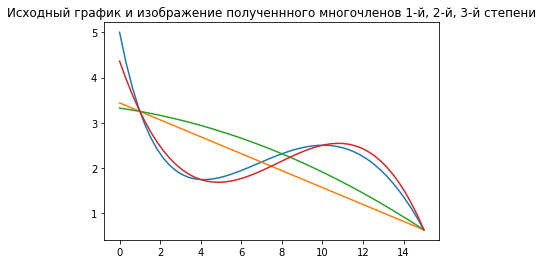

In [162]:
y3 = [f3(ansthr[0], ansthr[1], ansthr[2], ansthr[3], i) for i in x]
plt.plot(x, y, x, y1, x, y2, x, y3)
plt.title('Исходный график и изображение полученнного многочленов 1-й, 2-й, 3-й степени')

In [163]:
file_obj = open('anstwo', 'w')
file_obj.writelines(i + ' ' for i in map(str, ansthr))
file_obj.close()